### Clase 3 Modulo 6
#### Reduccion de dimensionalidad PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import umap
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Step 1: Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [7]:
n_digits = X.shape[0]
X.shape, np.unique(y)

((1797, 64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

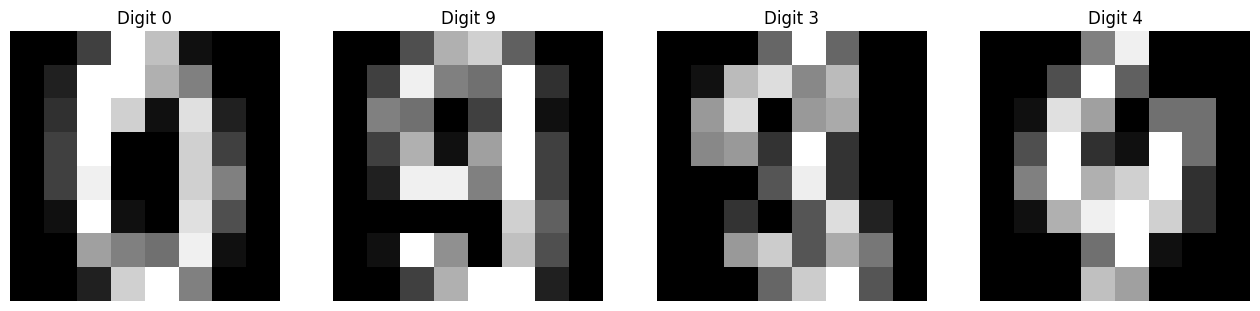

In [8]:
# Step 2: Visualize some digits
fig, axs = plt.subplots(
    1, 4,
    figsize=(16, 8)
)

random_digits = np.random.randint(0, n_digits, 4)

for i, ax in enumerate(axs.flatten()):
    n = random_digits[i]
    ax.imshow(X[n].reshape(8, 8), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Digit {y[n]}')

In [10]:
# Step 3: Perform PCA on the digits dataset
# Keep components explaining 80% of variance
pca = PCA(n_components=64)
pca.fit(X)
X_pca = pca.transform(X)

# Step 4: Take the principal components that explain 80% of the variance
n_components = X_pca.shape[1]
print(f'Number of components: {n_components}')

Number of components: 64


### Recontructed digit

Text(0.5, 1.0, 'Reconstructed Digit [9]')

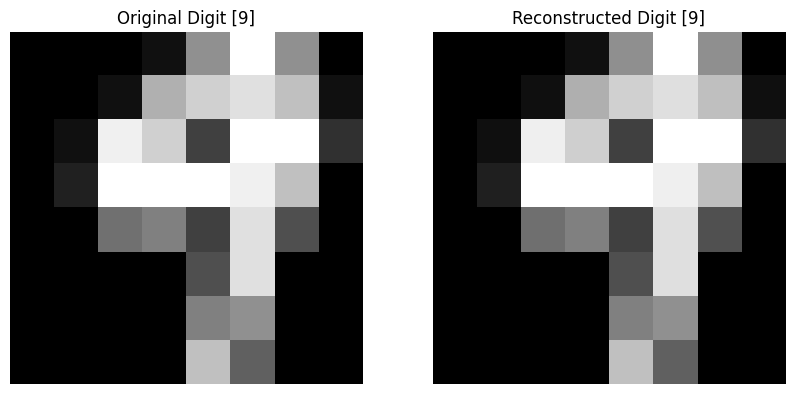

In [11]:
# Step 5: Show a grid of original and reconstructed digits
fig, axs = plt.subplots(
    1, 2,
    figsize=(10, 8)
)

n = np.random.randint(0, n_digits, 1)

# Original digit
axs[0].imshow(X[n].reshape(8, 8), cmap='gray')
axs[0].axis('off')
axs[0].set_title(f'Original Digit {y[n]}')

# Reconstructed digit using PCA components

digit_reconstructed = pca.inverse_transform(X_pca[n])

axs[1].imshow(digit_reconstructed.reshape(8, 8), cmap='gray')
axs[1].axis('off')
axs[1].set_title(f'Reconstructed Digit {y[n]}')

In [12]:
residuo = np.mean((X[n] - digit_reconstructed)**2)
print(f'Residuo: {residuo}')

Residuo: 8.273950820603609e-29


## Explained variance

In [13]:
pca = PCA(n_components=64)
pca.fit(X)
X_pca = pca.transform(X)

n_components = X_pca.shape[1]

### Visualization

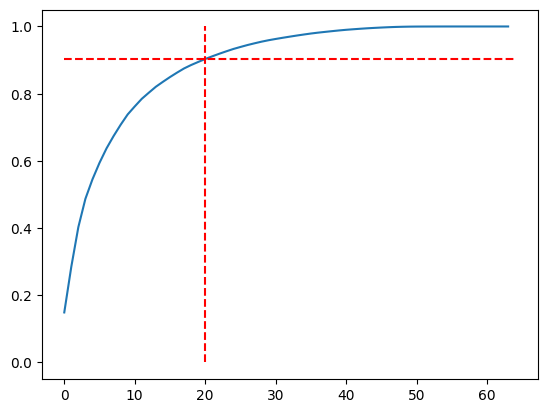

In [14]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(n_components), cum_sum)
plt.vlines(
    x=20,
    ymin=0,
    ymax=1,
    linestyles='dashed',
    colors='red'
)
plt.hlines(
    y=cum_sum[20],
    xmin=0,
    xmax=64,
    linestyles='dashed',
    colors='red'
)

In [1]:
pip uninstall umap

^C
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Keep 2 components
pca_2 = PCA(n_components=2)
pca_2.fit(X)
X_pca_2 = pca_2.transform(X)

In [16]:
X_pca_2.shape

(1797, 2)

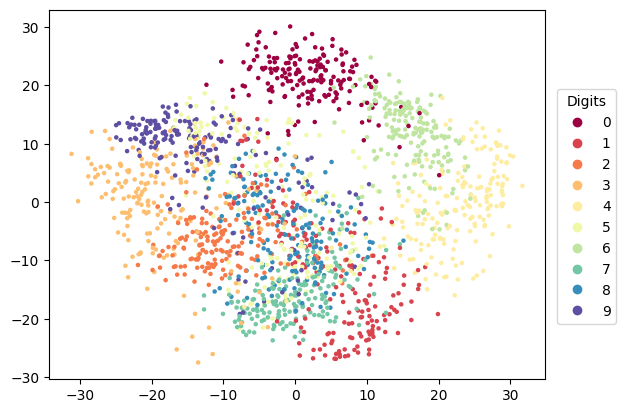

In [17]:
fig, ax = plt.subplots(
    figsize=None
)

color = y.astype(int)

scatter = ax.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap="Spectral", s=5)

# Get unique digits from the target variable
unique_digits = np.unique(y)

# Create a legend with labels for each digit
legend_labels = [str(digit) for digit in unique_digits]
ax.legend(
    handles=scatter.legend_elements()[0],
    labels=legend_labels,
    title="Digits",
    loc=(1.025, 0.15),
)

In [18]:
# Explained variance 2 components
exp_var = pca_2.explained_variance_ratio_.sum()
exp_var

0.28509364823691874

#### Uniform Manifold Approximation

In [23]:
reducer = umap.UMAP()
reducer.fit(X)
X_umap = reducer.transform(X)
X_umap.shape

AttributeError: module 'umap' has no attribute 'UMAP'

NameError: name 'X_umap' is not defined

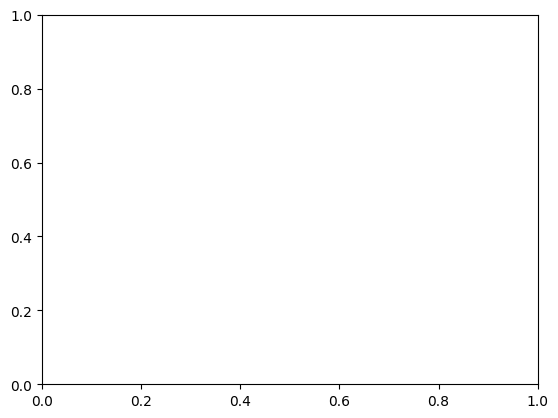

In [20]:
fig, ax = plt.subplots(
    figsize=None
)

color = y.astype(int)

scatter = ax.scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=color, cmap="Spectral",
    s=5
)

# Get unique digits from the target variable
unique_digits = np.unique(y)

# Create a legend with labels for each digit
legend_labels = [str(digit) for digit in unique_digits]
ax.legend(
    handles=scatter.legend_elements()[0],
    labels=legend_labels,
    title="Digits",
    loc=(1.025, 0.15),
)

In [ ]:
fig, axs = plt.subplots(
    1, 2,
    figsize=(12, 5),
    tight_layout=True
)

color = y.astype(int)

axs[0].scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=color, cmap="Spectral",
    s=5
)
axs[0].legend()

scatter = axs[1].scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=color, cmap="Spectral",
    s=5
)
# Get unique digits from the target variable
unique_digits = np.unique(y)

# Create a legend with labels for each digit
legend_labels = [str(digit) for digit in unique_digits]
axs[1].legend(
    handles=scatter.legend_elements()[0],
    labels=legend_labels,
    title="Digits",
    loc=(1.025, 0.15),
)

In [ ]:
X.shape